# Simple CNN model from Scratch

In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

Using plaidml.keras.backend backend.


In [2]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

In [3]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

INFO:plaidml:Opening device "opencl_amd_hainan.0"


In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

### Importing dataset from Dataset_utils

In [6]:
import import_ipynb
from Dataset_utils import get_imgs_scaled, get_labels_enc

importing Jupyter notebook from Dataset_utils.ipynb


In [7]:
train_imgs_scaled, validation_imgs_scaled = get_imgs_scaled()
train_labels_enc, validation_labels_enc = get_labels_enc()

In [8]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 70s 23ms/step - loss: 0.8142 - acc: 0.5523 - val_loss: 0.6574 - val_acc: 0.5730
Epoch 2/30
3000/3000 [==============================] - 58s 19ms/step - loss: 0.6291 - acc: 0.6577 - val_loss: 0.5767 - val_acc: 0.6970
Epoch 3/30
3000/3000 [==============================] - 58s 19ms/step - loss: 0.5483 - acc: 0.7213 - val_loss: 0.5403 - val_acc: 0.7060
Epoch 4/30
3000/3000 [==============================] - 59s 20ms/step - loss: 0.4665 - acc: 0.7663 - val_loss: 0.5668 - val_acc: 0.7200
Epoch 5/30
3000/3000 [==============================] - 58s 19ms/step - loss: 0.3842 - acc: 0.8257 - val_loss: 0.6145 - val_acc: 0.7200
Epoch 6/30
3000/3000 [==============================] - 59s 20ms/step - loss: 0.2897 - acc: 0.8723 - val_loss: 0.7016 - val_acc: 0.7050
Epoch 7/30
3000/3000 [==============================] - 58s 19ms/step - loss: 0.2081 - acc: 0.9193 - val_loss: 0.8269 - val_acc: 0.7060


In [9]:
# save model
import os

if(not os.path.exists('saved_models')):
    os.mkdir('saved_models')
model.save('saved_models/simple_cnn_model.h5')

In [10]:
import pickle
import os

if(not os.path.exists('saved_history')):
    os.mkdir('saved_history')
f = open('saved_history/simple_cnn_model.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

In [12]:
import pickle

file = 'saved_history/simple_cnn_model.pckl'
f = open(file, 'rb')
hist = pickle.load(f)
f.close()

In [13]:
import import_ipynb
from model_summary import plot_graph

importing Jupyter notebook from model_summary.ipynb


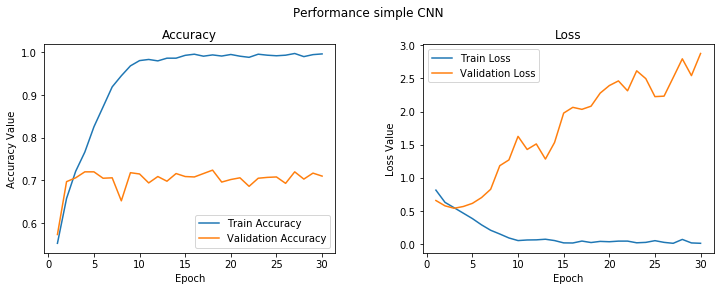

In [14]:
performance = 'Performance simple CNN'
plot_graph(performance, hist, 30)